In [1]:
!mkdir dataset
!mv bank_data.csv dataset

In [4]:
# Packages
# Data Processing
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
# Statistics
import math
from scipy import stats
from scipy.stats import norm
# File Path
import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/bank_data.csv


In [5]:
# version check
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 1.23.5
pandas version: 1.5.3


In [8]:
# # Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [10]:
# setting
path_root = "./"
seed = 394

In [11]:
df_bank = pd.read_csv(path_root + "dataset/bank_data.csv")


**Overview**

In [12]:
df_bank.shape


(4521, 18)

In [13]:
display(df_bank.head())
display(df_bank.tail())

Unnamed: 0  age          job  marital  education default  balance housing  \
0           0   30   unemployed  married    primary      no     1787      no   
1           1   33     services  married  secondary      no     4789     yes   
2           2   35   management   single   tertiary      no     1350     yes   
3           3   30   management  married   tertiary      no     1476     yes   
4           4   59  blue-collar  married  secondary      no        0     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  cellular   19   oct        79         1     -1         0  unknown  no  
1  yes  cellular   11   may       220         1    339         4  failure  no  
2   no  cellular   16   apr       185         1    330         1  failure  no  
3  yes   unknown    3   jun       199         4     -1         0  unknown  no  
4   no   unknown    5   may       226         1     -1         0  unknown  no

Unnamed: 0  age            job  marital  education default  balance  \
4516        4516   33       services  married  secondary      no     -333   
4517        4517   57  self-employed  married   tertiary     yes    -3313   
4518        4518   57     technician  married  secondary      no      295   
4519        4519   28    blue-collar  married  secondary      no     1137   
4520        4520   44   entrepreneur   single   tertiary      no     1136   

     housing loan   contact  day month  duration  campaign  pdays  previous  \
4516     yes   no  cellular   30   jul       329         5     -1         0   
4517     yes  yes   unknown    9   may       153         1     -1         0   
4518      no   no  cellular   19   aug       151        11     -1         0   
4519      no   no  cellular    6   feb       129         4    211         3   
4520     yes  yes  cellular    3   apr       345         2    249         7   

     poutcome   y  
4516  unknown  no  
4517  unknown  no  
4518  unknown  no  
4519    other  no  
4520    other  no

In [14]:
df_bank.columns


Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df_bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [16]:
# categorical features
list_categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
]
df_bank[list_categorical_features] = df_bank[list_categorical_features].astype('category')
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  4521 non-null   int64   
 1   age         4521 non-null   int64   
 2   job         4521 non-null   category
 3   marital     4521 non-null   category
 4   education   4521 non-null   category
 5   default     4521 non-null   category
 6   balance     4521 non-null   int64   
 7   housing     4521 non-null   category
 8   loan        4521 non-null   category
 9   contact     4521 non-null   category
 10  day         4521 non-null   int64   
 11  month       4521 non-null   category
 12  duration    4521 non-null   int64   
 13  campaign    4521 non-null   int64   
 14  pdays       4521 non-null   int64   
 15  previous    4521 non-null   int64   
 16  poutcome    4521 non-null   category
 17  y           4521 non-null   object  
dtypes: category(9), int64(8), object(1)
memory usage

In [17]:
# descriptive statistics
display(df_bank.describe().round(3).T) # numerical
display(df_bank.describe(include = ['object', 'bool', 'category']).T) # categorical

count      mean       std     min     25%     50%     75%  \
Unnamed: 0  4521.0  2260.000  1305.245     0.0  1130.0  2260.0  3390.0   
age         4521.0    41.170    10.576    19.0    33.0    39.0    49.0   
balance     4521.0  1422.658  3009.638 -3313.0    69.0   444.0  1480.0   
day         4521.0    15.915     8.248     1.0     9.0    16.0    21.0   
duration    4521.0   263.961   259.857     4.0   104.0   185.0   329.0   
campaign    4521.0     2.794     3.110     1.0     1.0     2.0     3.0   
pdays       4521.0    39.767   100.121    -1.0    -1.0    -1.0    -1.0   
previous    4521.0     0.543     1.694     0.0     0.0     0.0     0.0   

                max  
Unnamed: 0   4520.0  
age            87.0  
balance     71188.0  
day            31.0  
duration     3025.0  
campaign       50.0  
pdays         871.0  
previous       25.0

count unique         top  freq
job        4521     12  management   969
marital    4521      3     married  2797
education  4521      4   secondary  2306
default    4521      2          no  4445
housing    4521      2         yes  2559
loan       4521      2          no  3830
contact    4521      3    cellular  2896
month      4521     12         may  1398
poutcome   4521      4     unknown  3705
y          4521      2          no  4000

**2. Data Cleaning**

In [18]:
# subsetting
df_bank = df_bank[[
#     'Unnamed: 0',
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
    'campaign', 'pdays', 'previous', 'poutcome', 'y'
]].copy()

In [19]:
# missing values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
# duplicated rows
df_bank.loc[df_bank.duplicated()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

There is no missing row or duplicated row.



**3. Univariate Analysis**

In [21]:
def summary_numerical_dist(df_data, col, q_min, q_max):

    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (2, 2)
    num_subplot = 4
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1), (1, 0), (1, 1)], [1, 1, 1, 1], [1, 1, 1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    sns.histplot(data = df_data, x = col, kde = True, ax = axes[0])
    stats.probplot(x = df_data[col], dist = stats.norm, plot = axes[1])
    sns.boxplot(data = df_data, x = col, ax = axes[2])
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(x = pts.index, y = pts, ax = axes[3])
    axes[3].grid(True)

    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

In [22]:
def summary_categorical_dist(df_data, col):

    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    count = df_data[col].value_counts().sort_index()

    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)

    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

**3.1. Numerical**

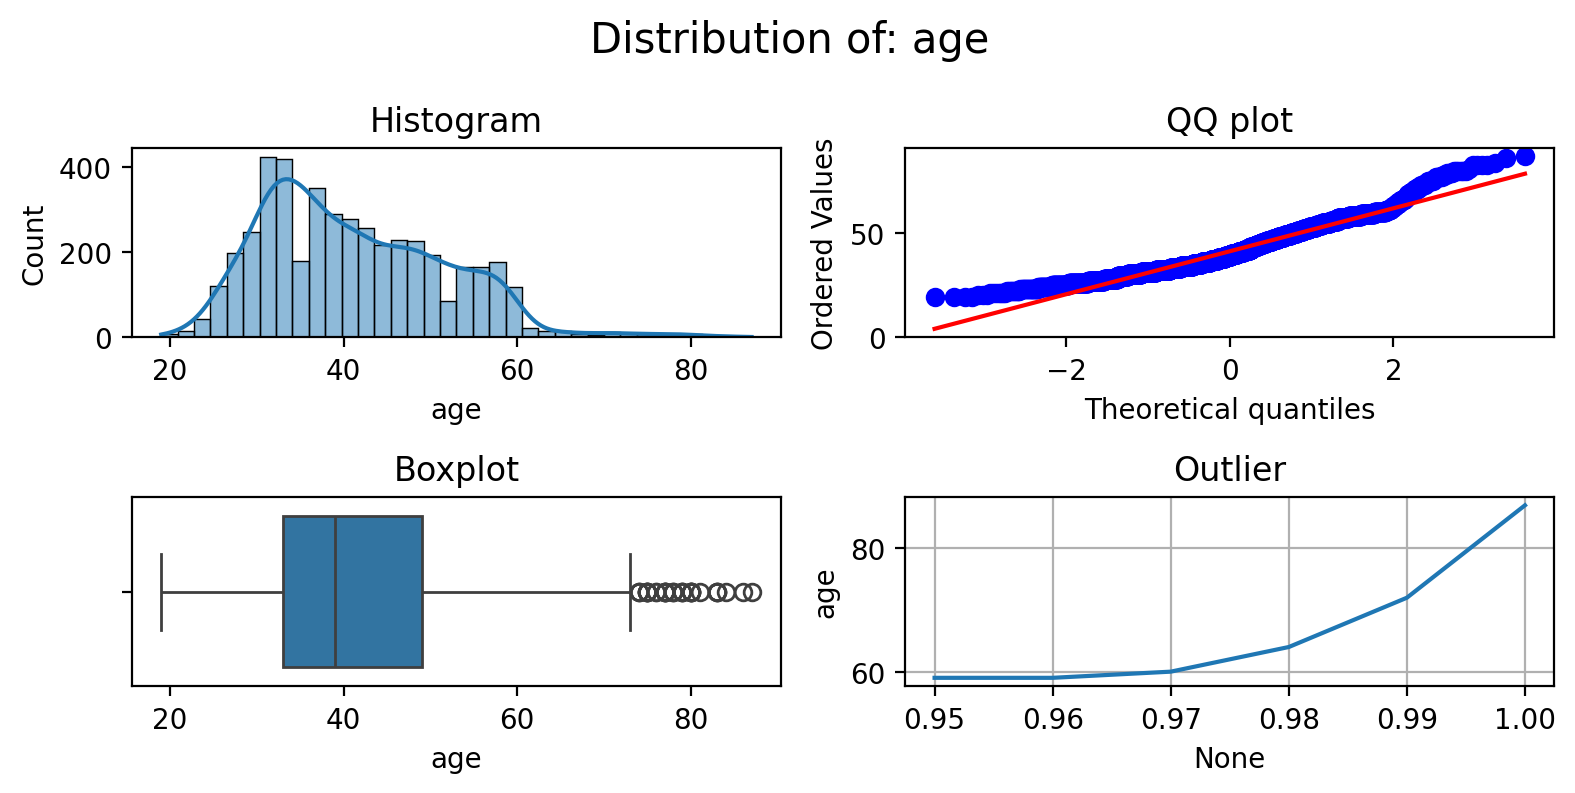

In [23]:
summary_numerical_dist(df_bank, 'age', .95, 1)

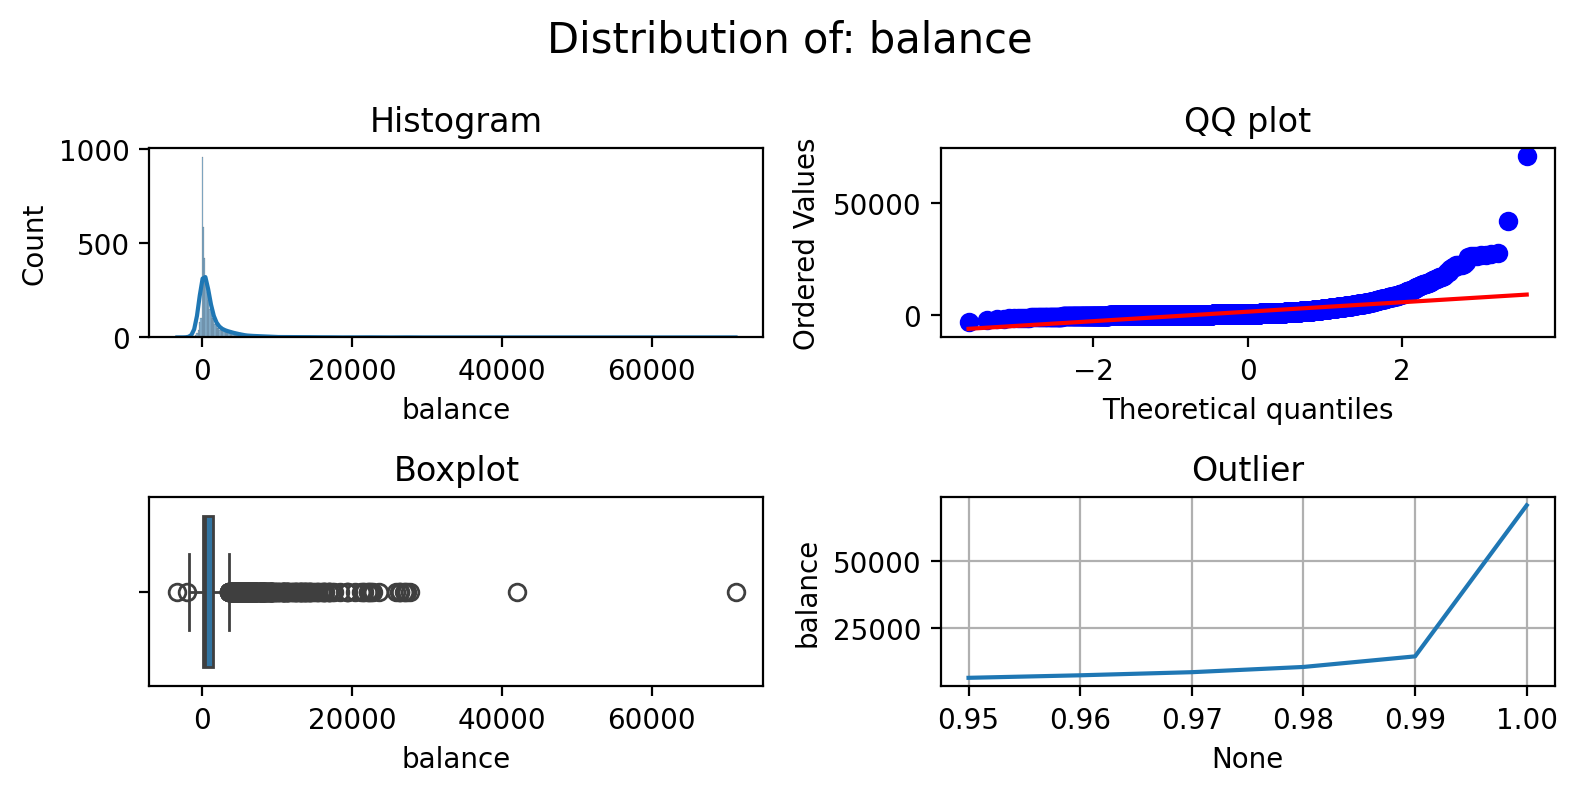

In [24]:
summary_numerical_dist(df_bank, 'balance', .95, 1)

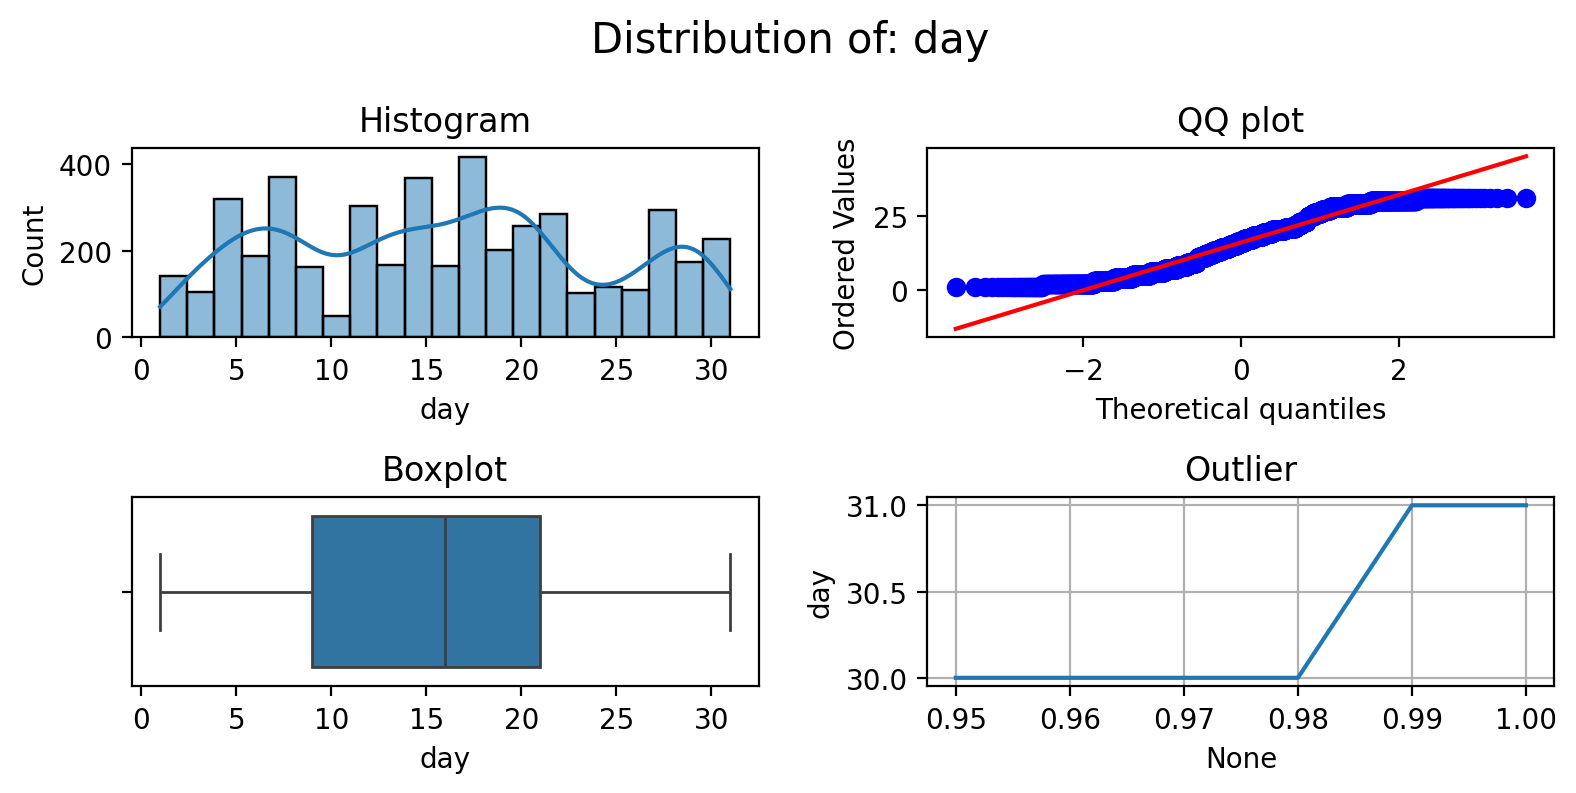

In [25]:
summary_numerical_dist(df_bank, 'day', .95, 1)

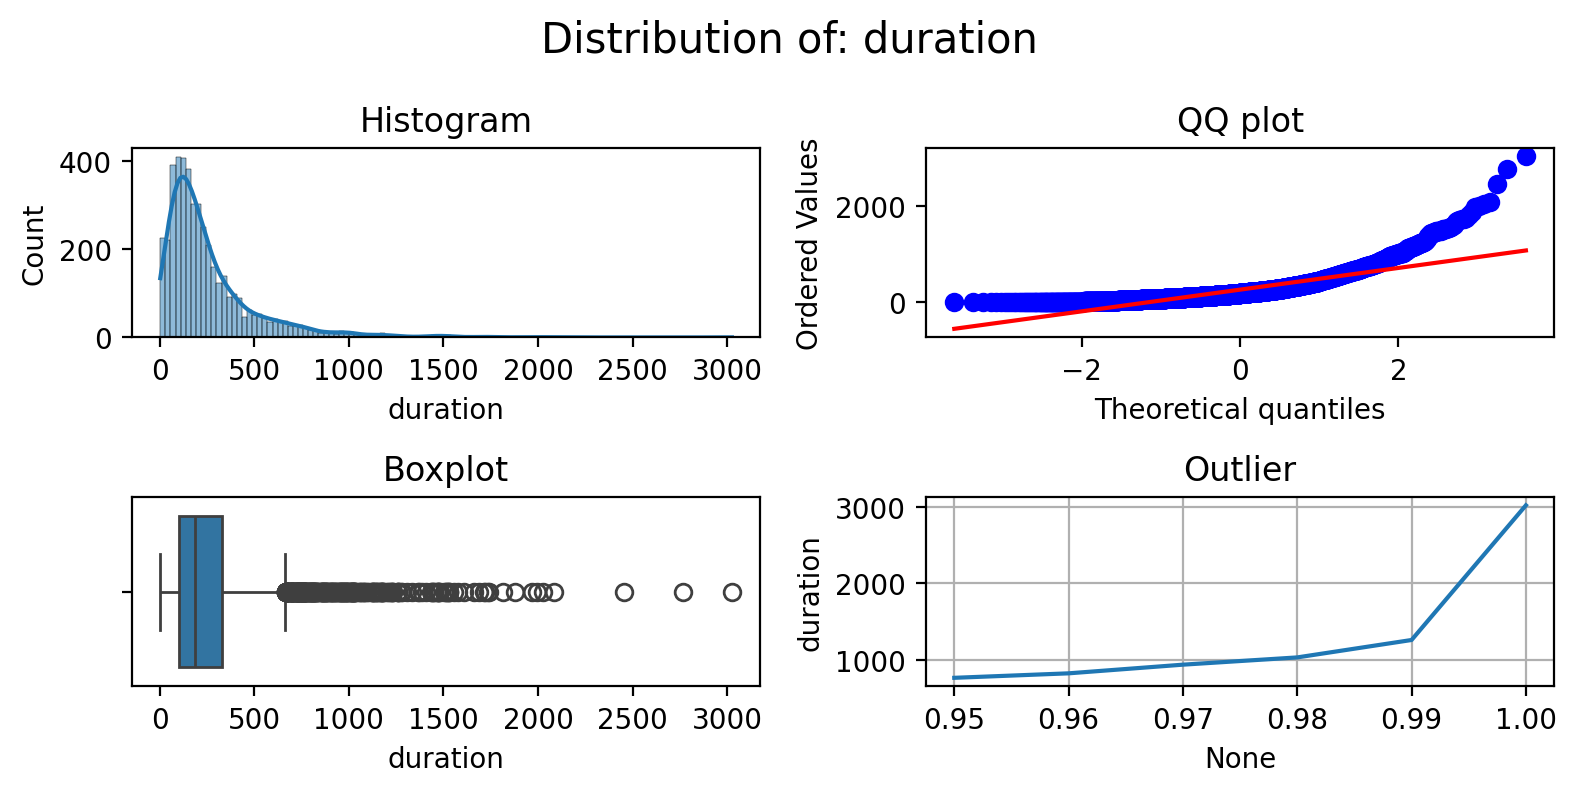

In [26]:
summary_numerical_dist(df_bank, 'duration', .95, 1)

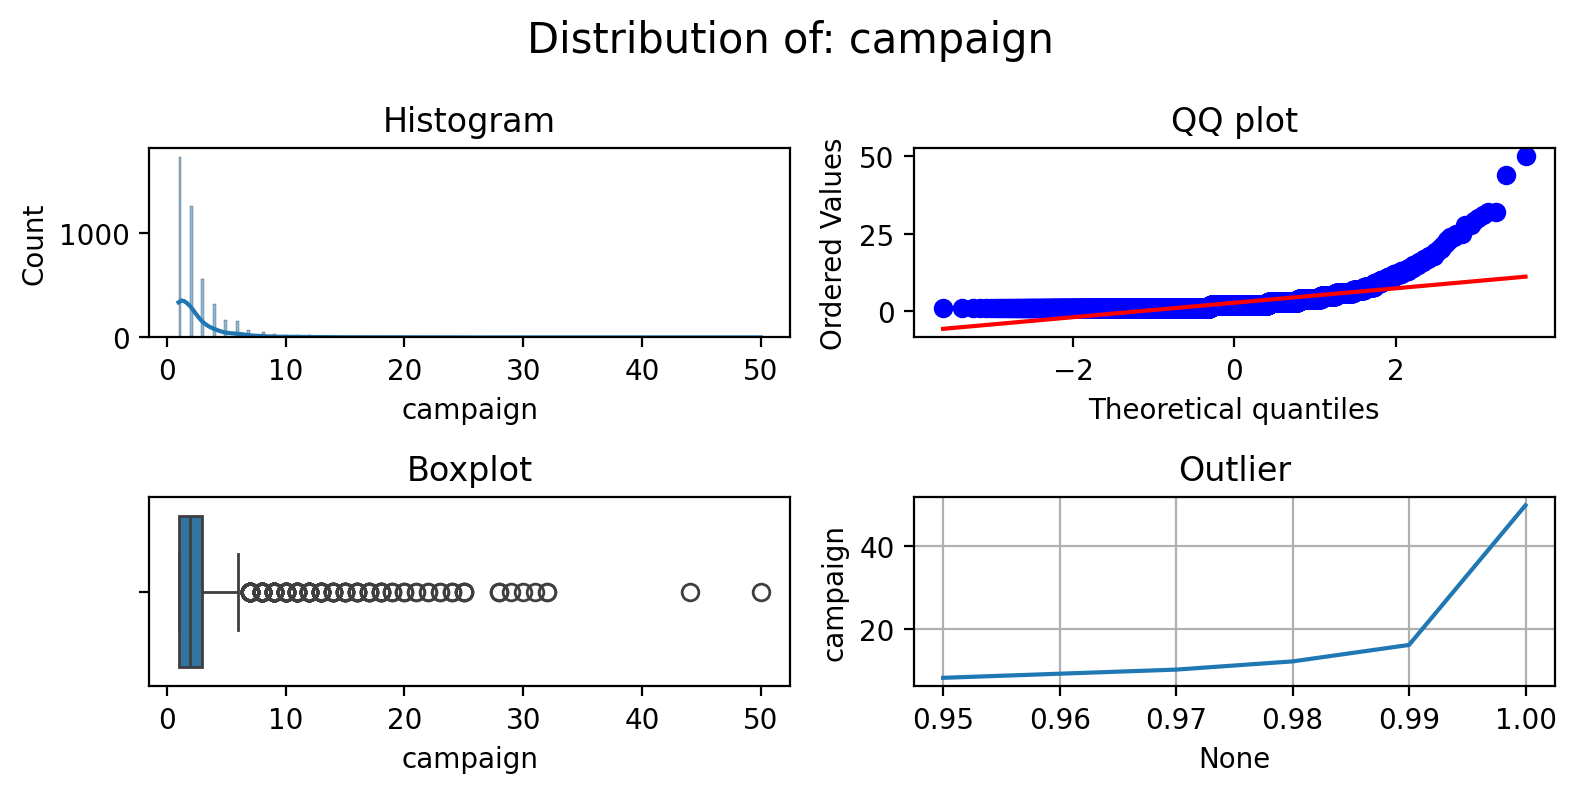

In [27]:
summary_numerical_dist(df_bank, 'campaign', .95, 1)

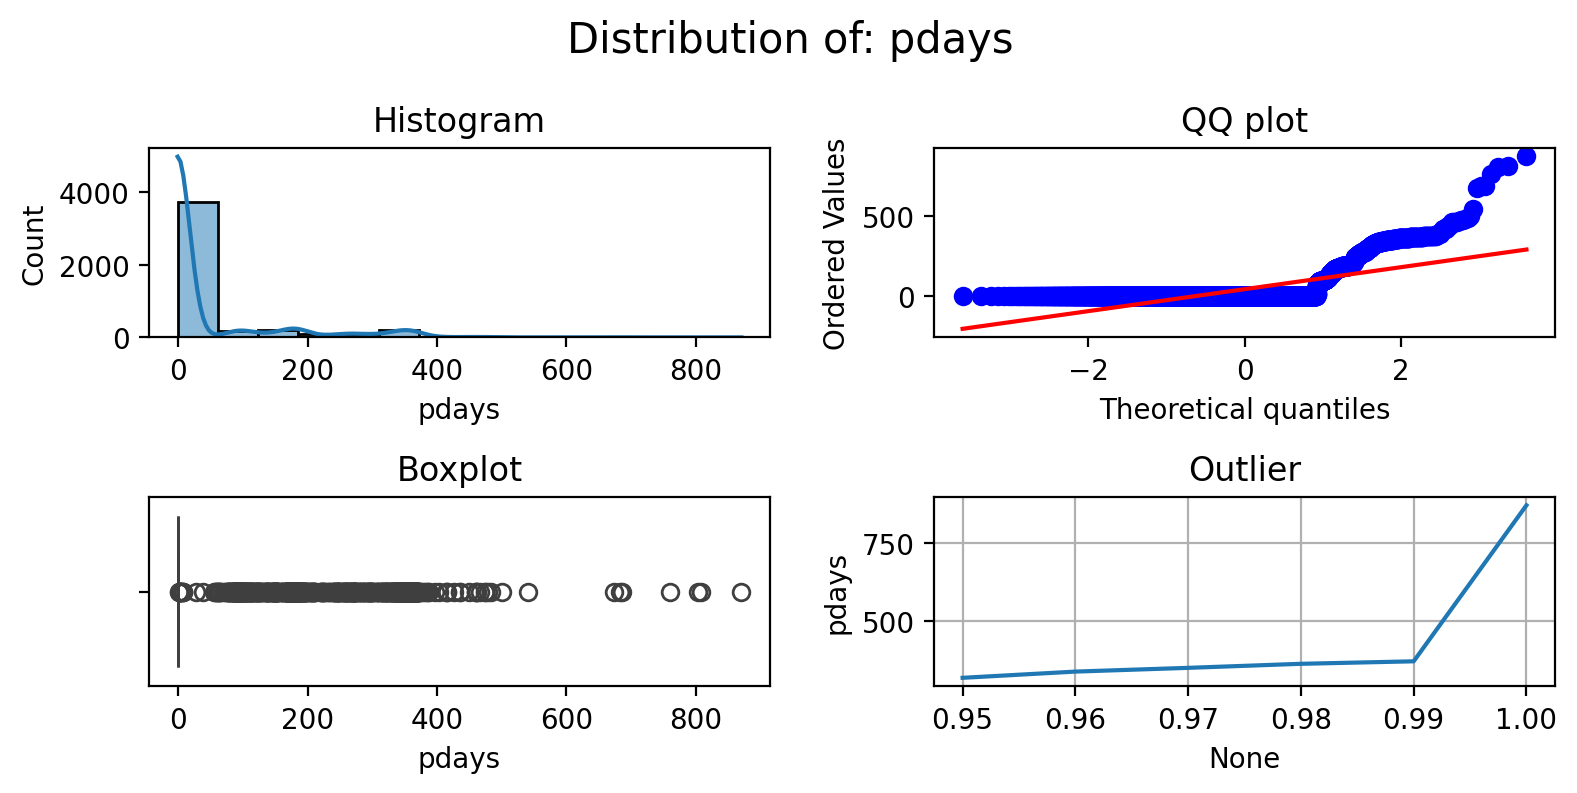

In [28]:
summary_numerical_dist(df_bank, 'pdays', .95, 1)

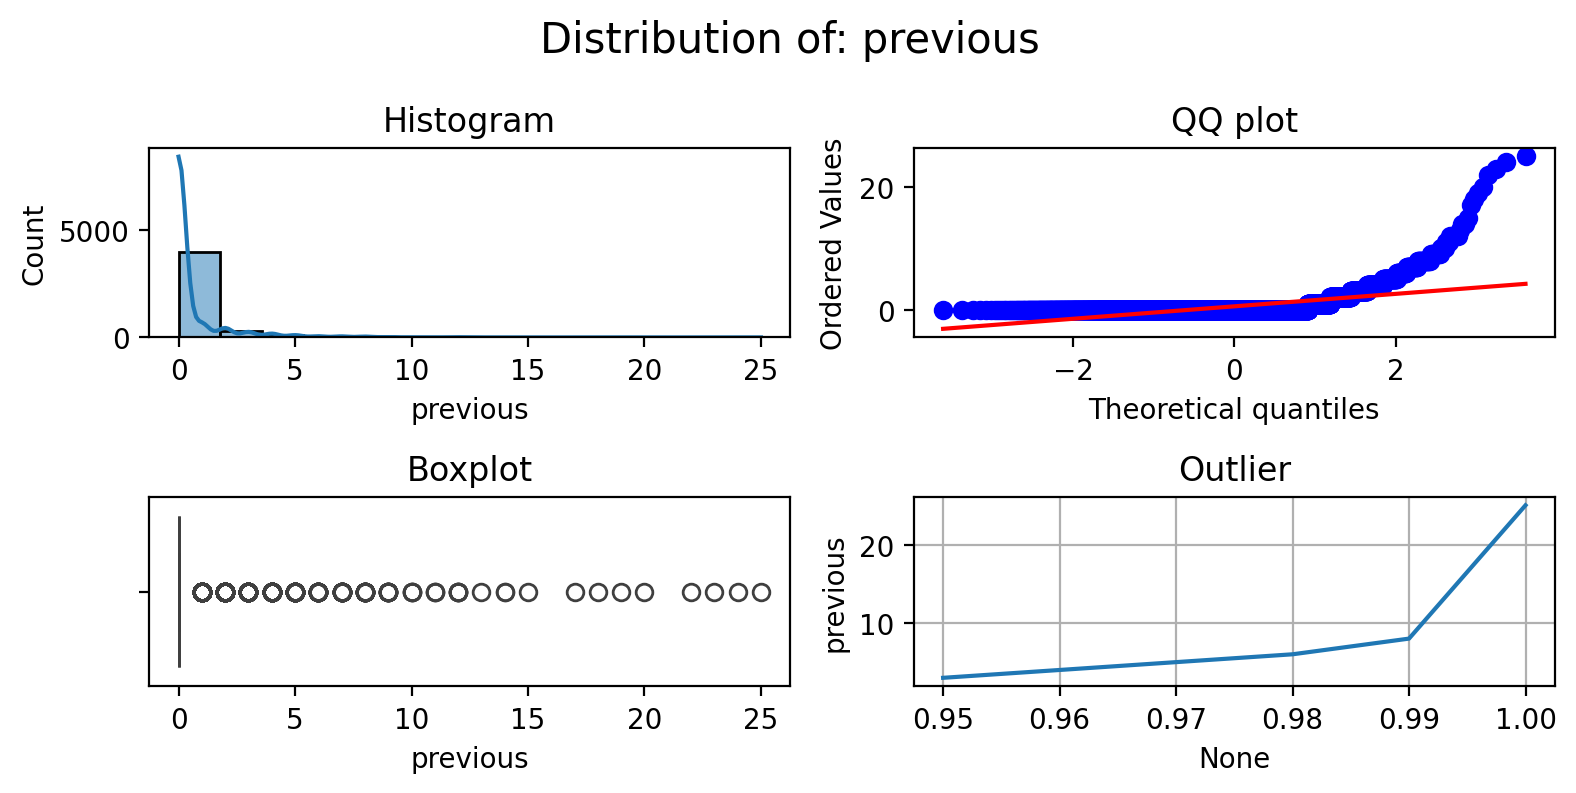

In [29]:
summary_numerical_dist(df_bank, 'previous', .95, 1)

**3.2. Categorical**

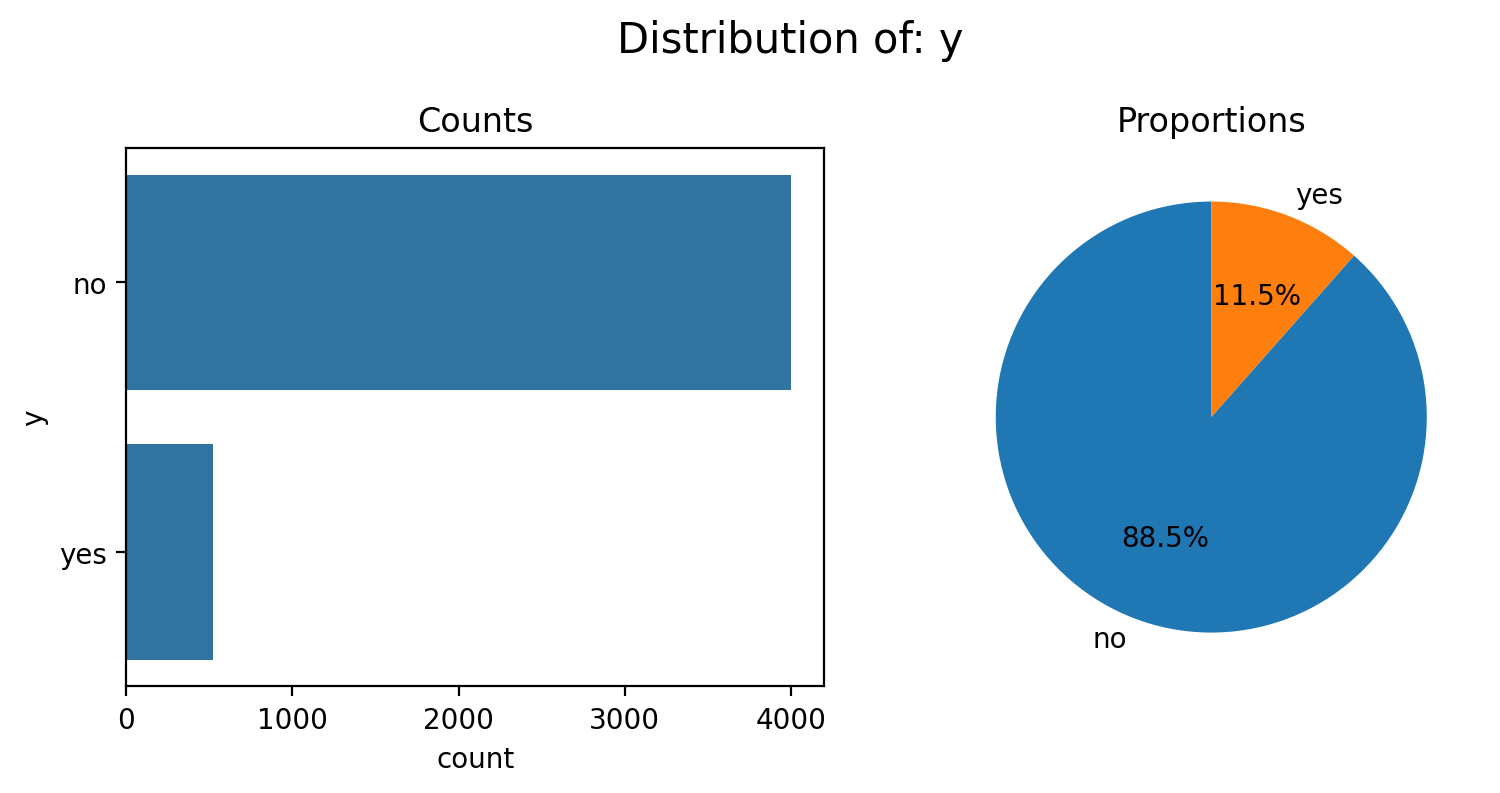

In [30]:
summary_categorical_dist(df_bank, 'y')

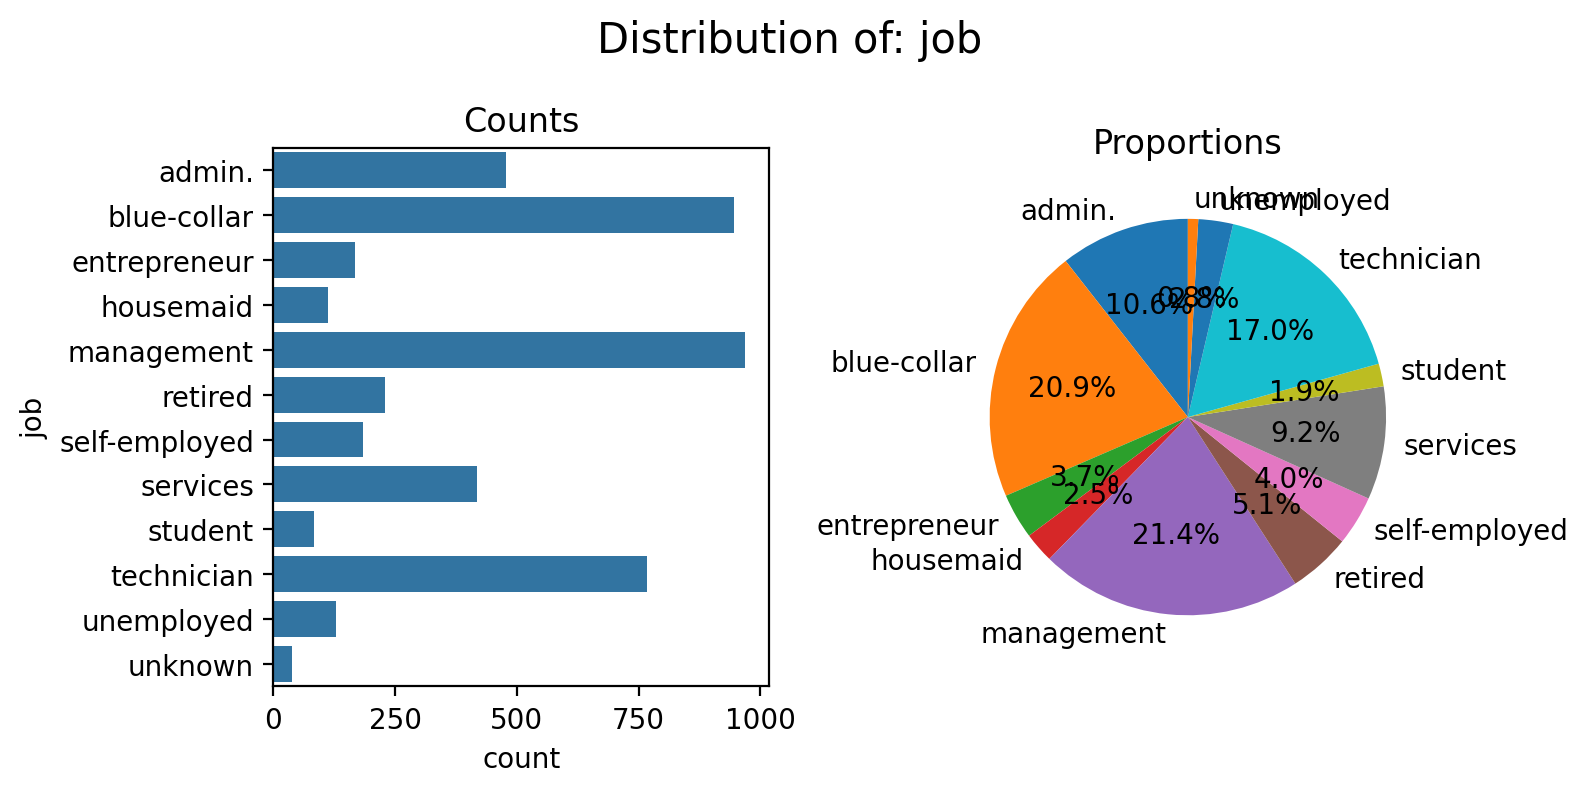

In [31]:
summary_categorical_dist(df_bank, 'job')

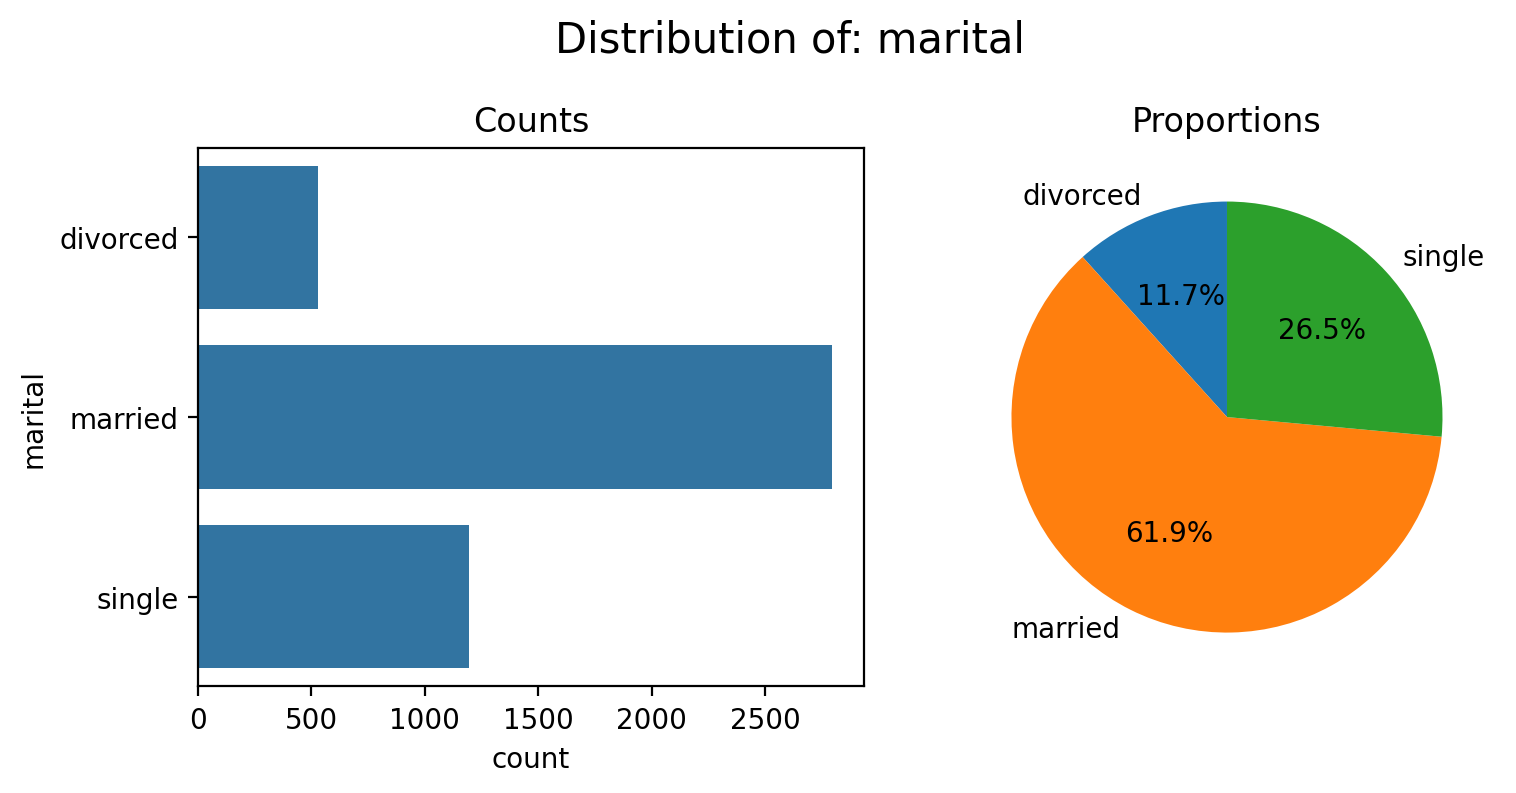

In [32]:
summary_categorical_dist(df_bank, 'marital')

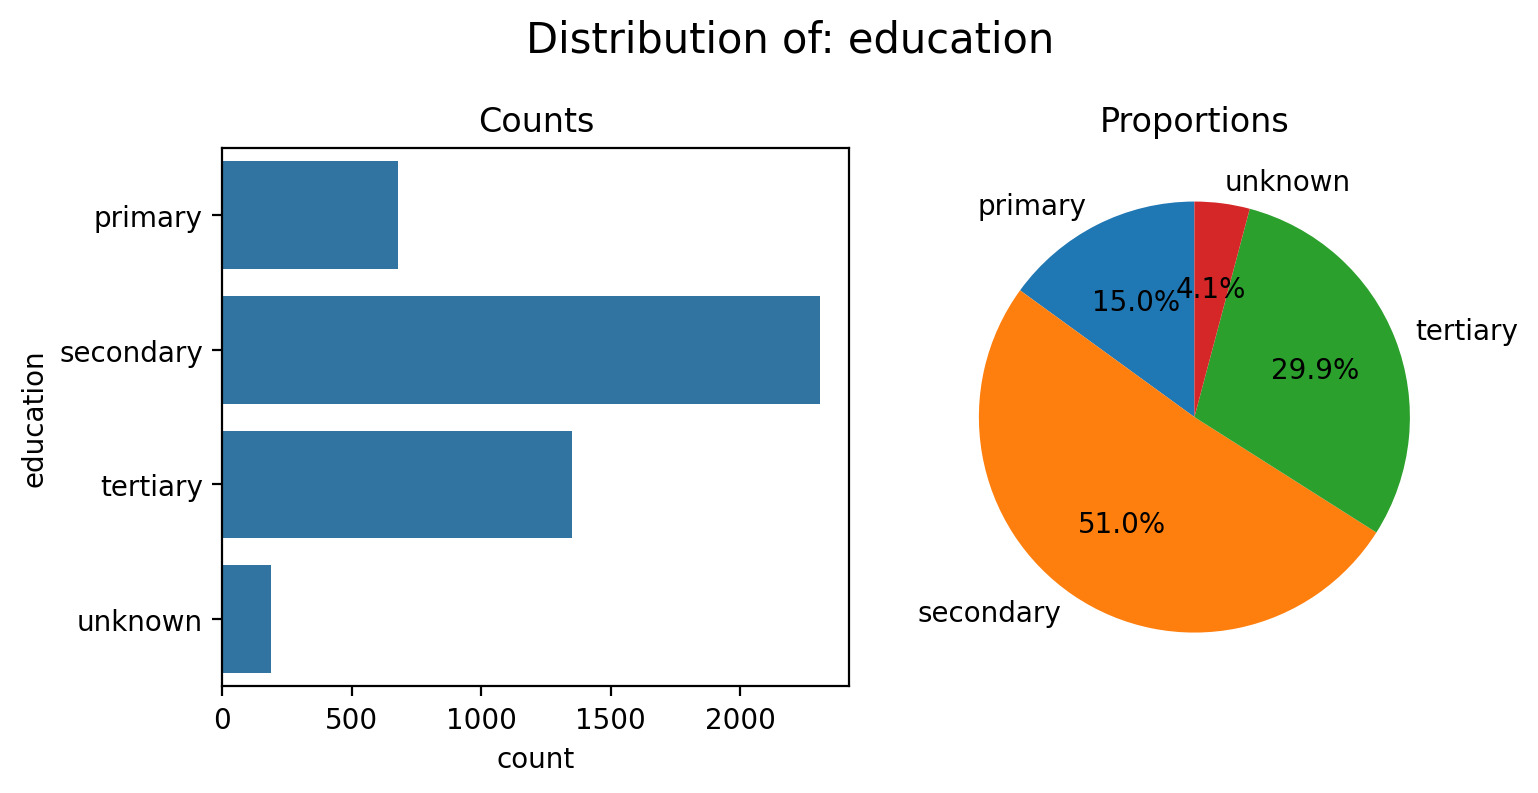

In [33]:
summary_categorical_dist(df_bank, 'education')

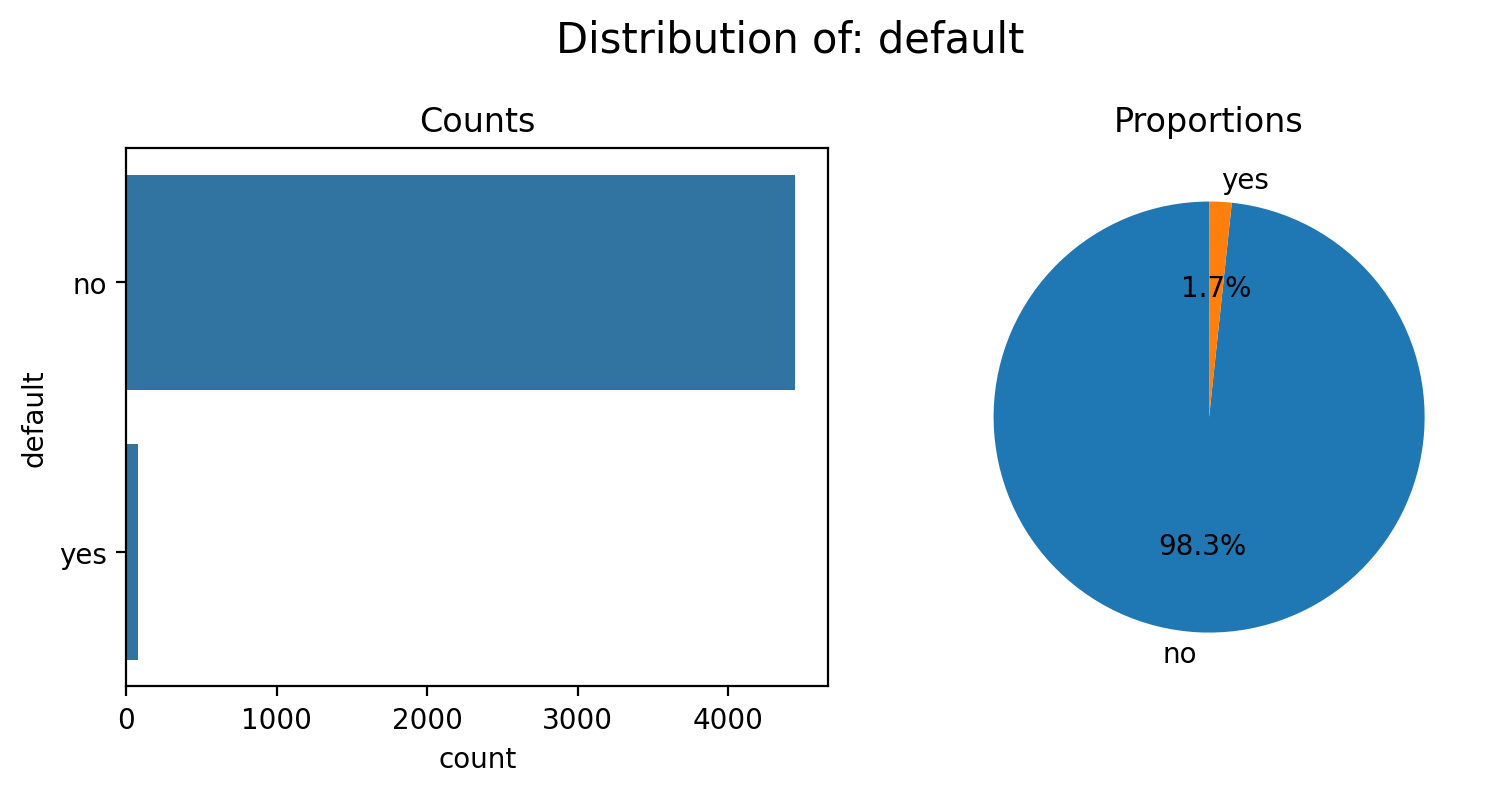

In [34]:
summary_categorical_dist(df_bank, 'default')

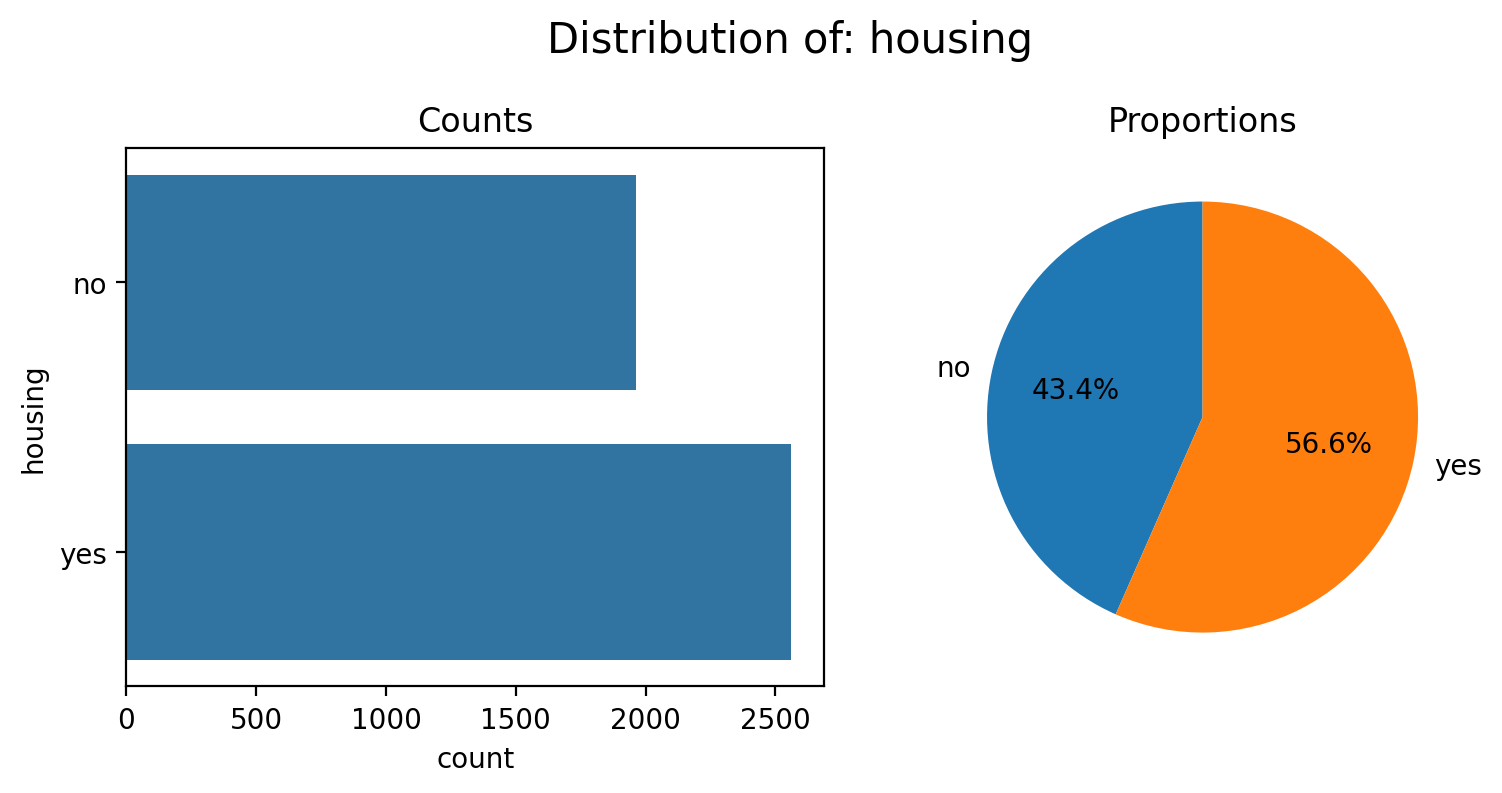

In [35]:
summary_categorical_dist(df_bank, 'housing')

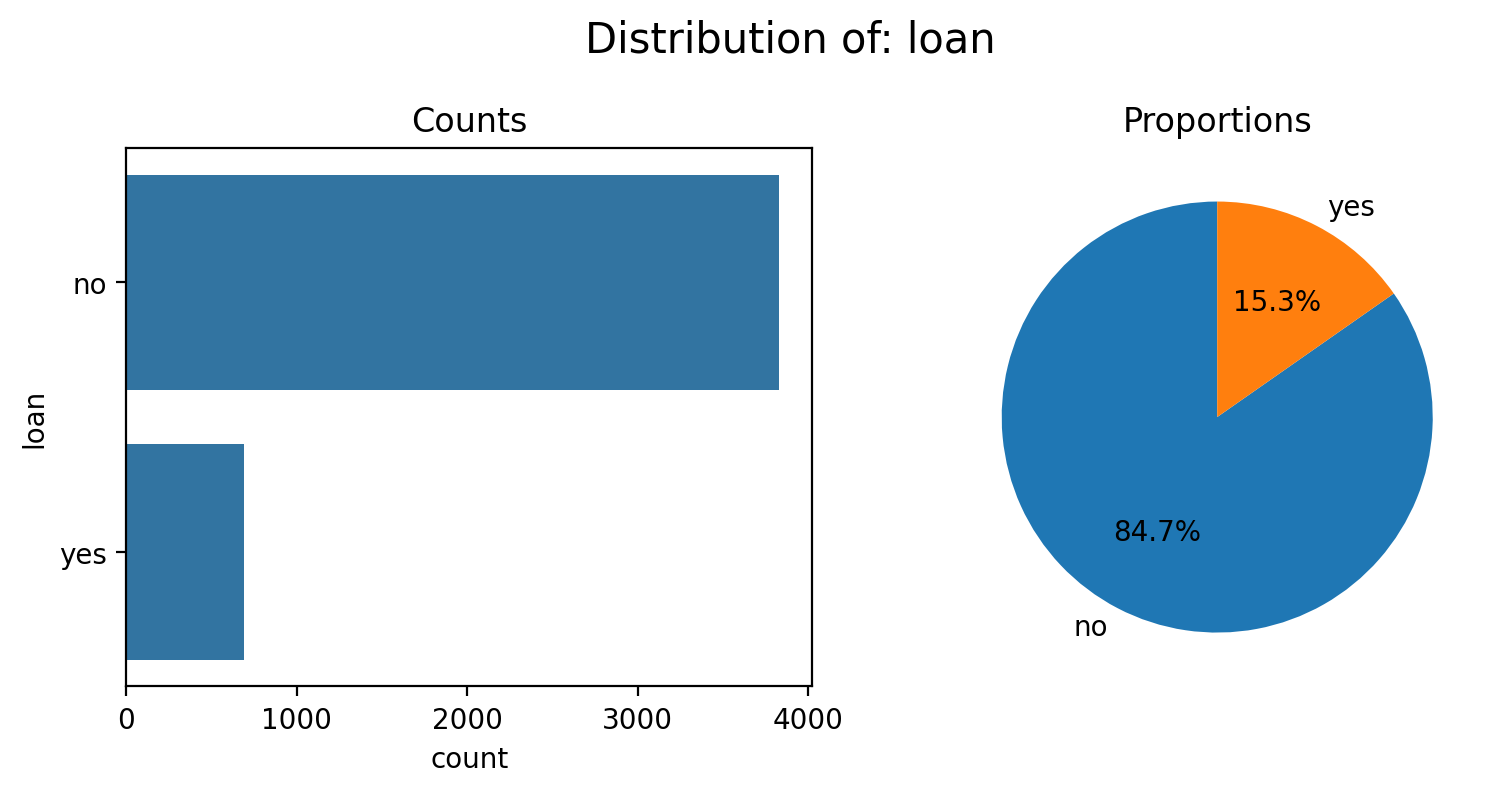

In [36]:
summary_categorical_dist(df_bank, 'loan')

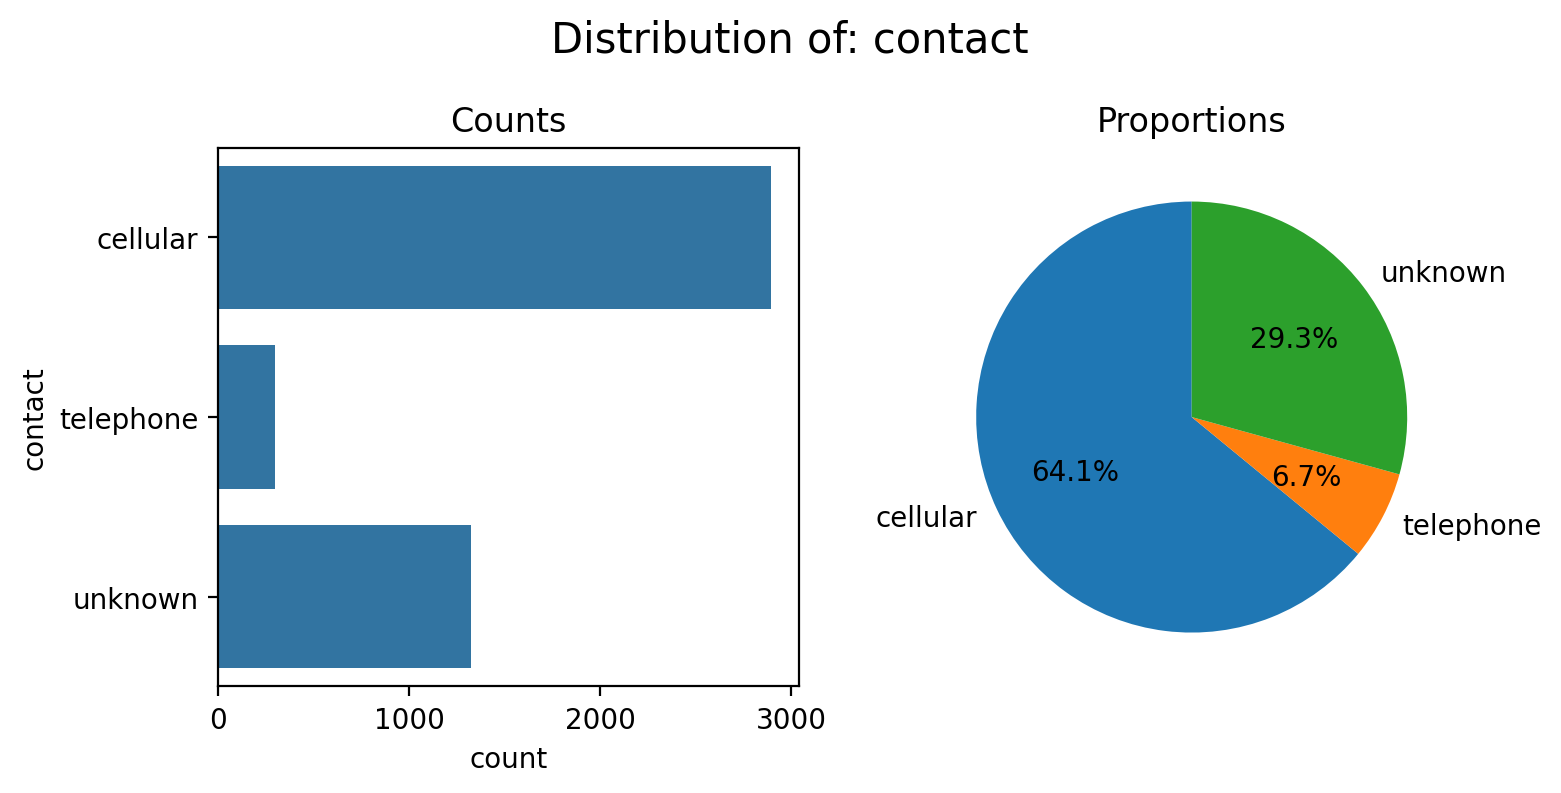

In [37]:
summary_categorical_dist(df_bank, 'contact')

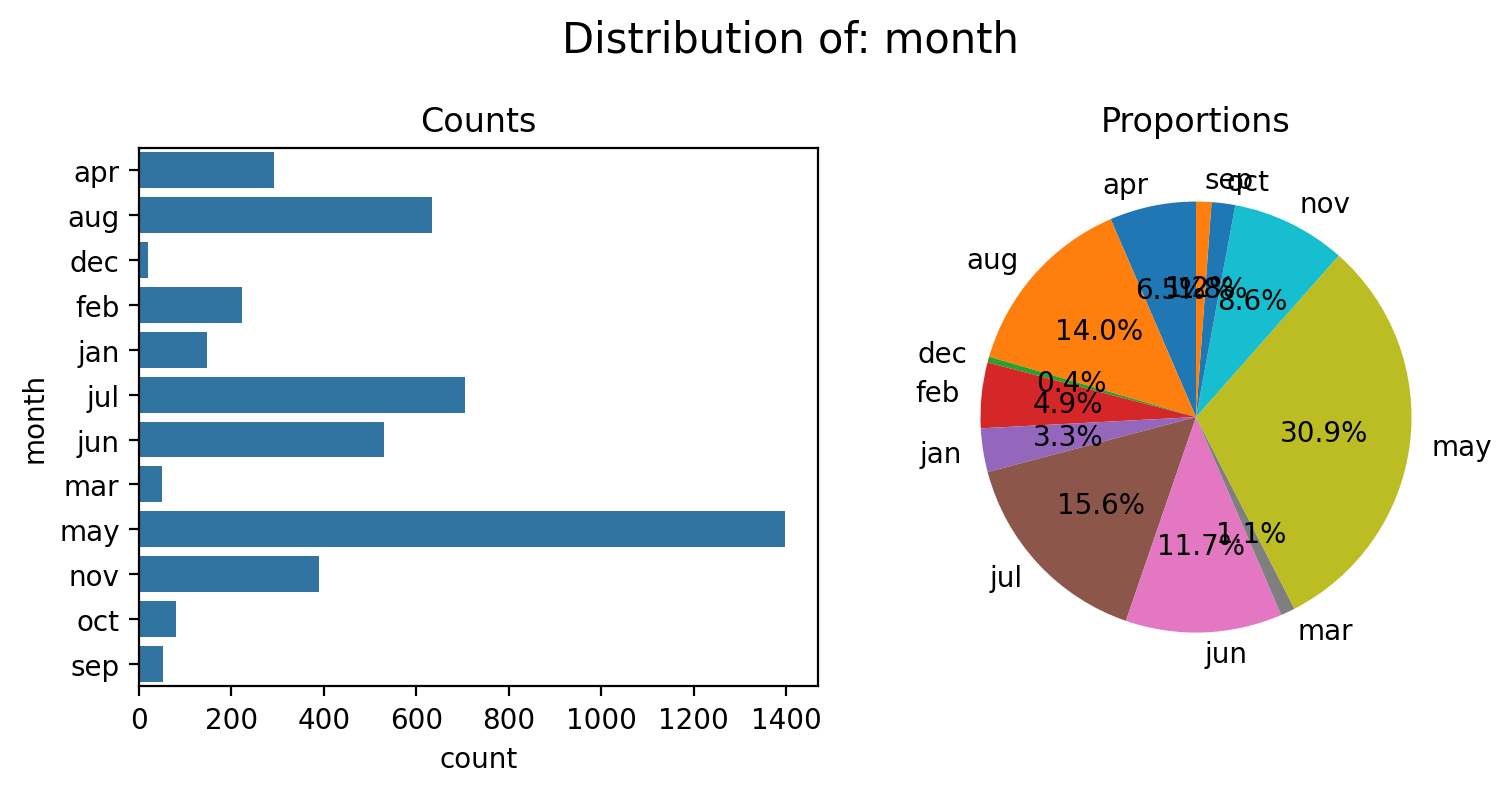

In [38]:
summary_categorical_dist(df_bank, 'month')

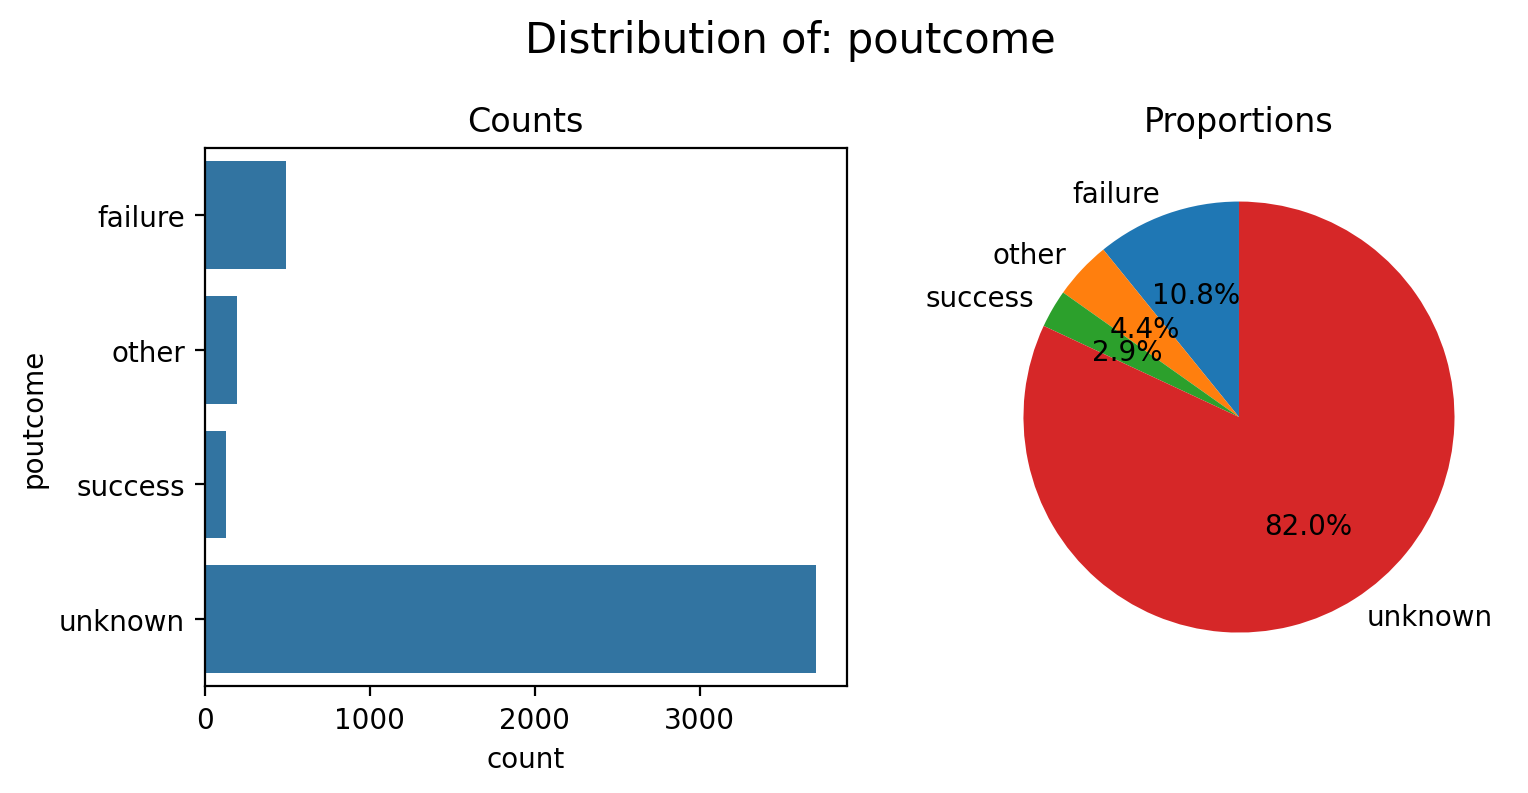

In [39]:
summary_categorical_dist(df_bank, 'poutcome')

**4. Relationship Analysis**

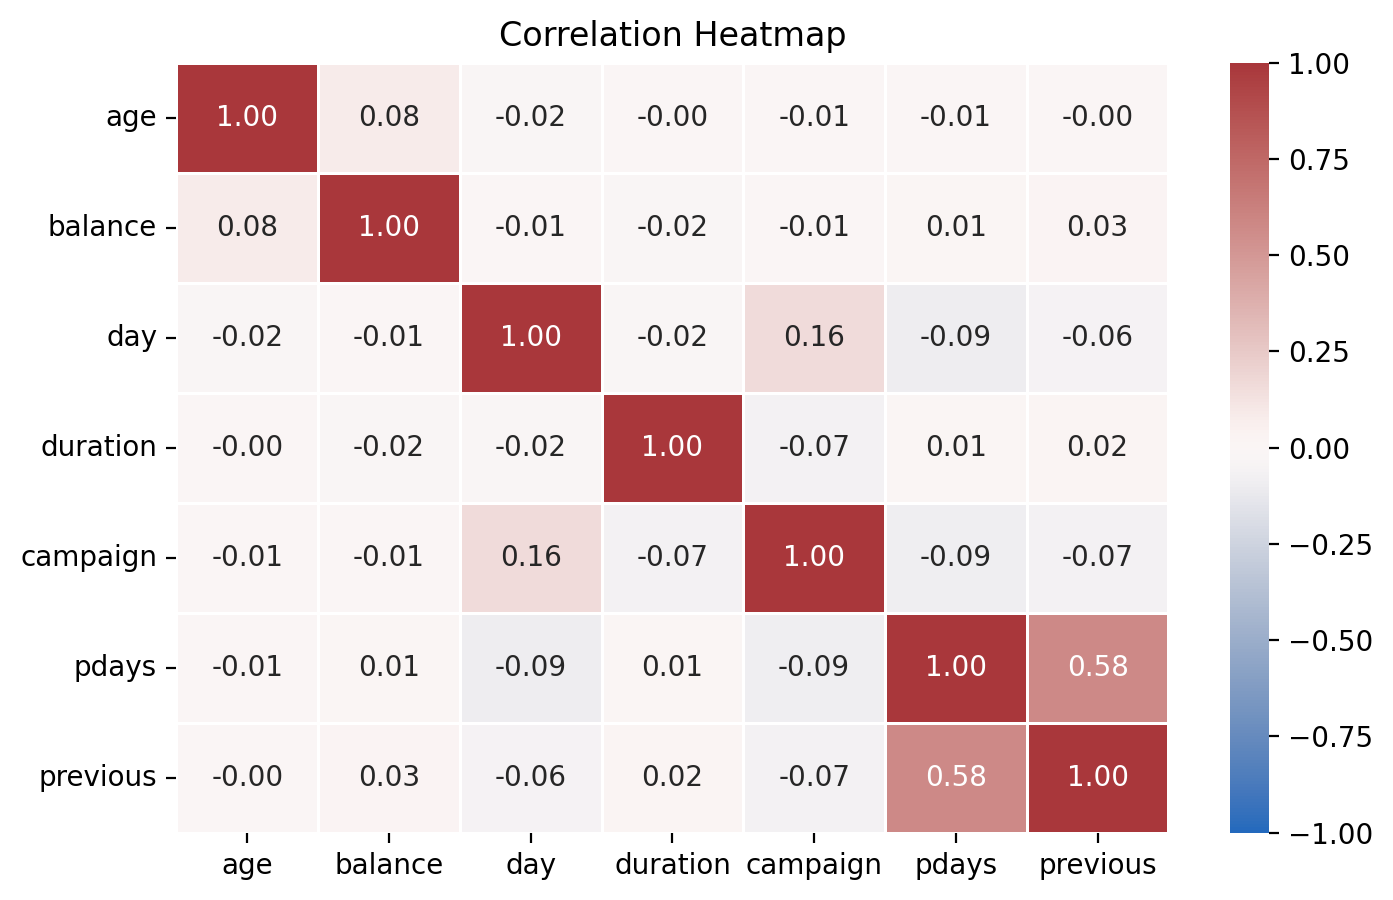

In [40]:
# correlation matrix
plt.figure(figsize = (8, 5), facecolor = "white")

# plotting
sns.heatmap(
    data = df_bank.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", linewidth = 0.5,
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

<Figure size 1600x1000 with 0 Axes>

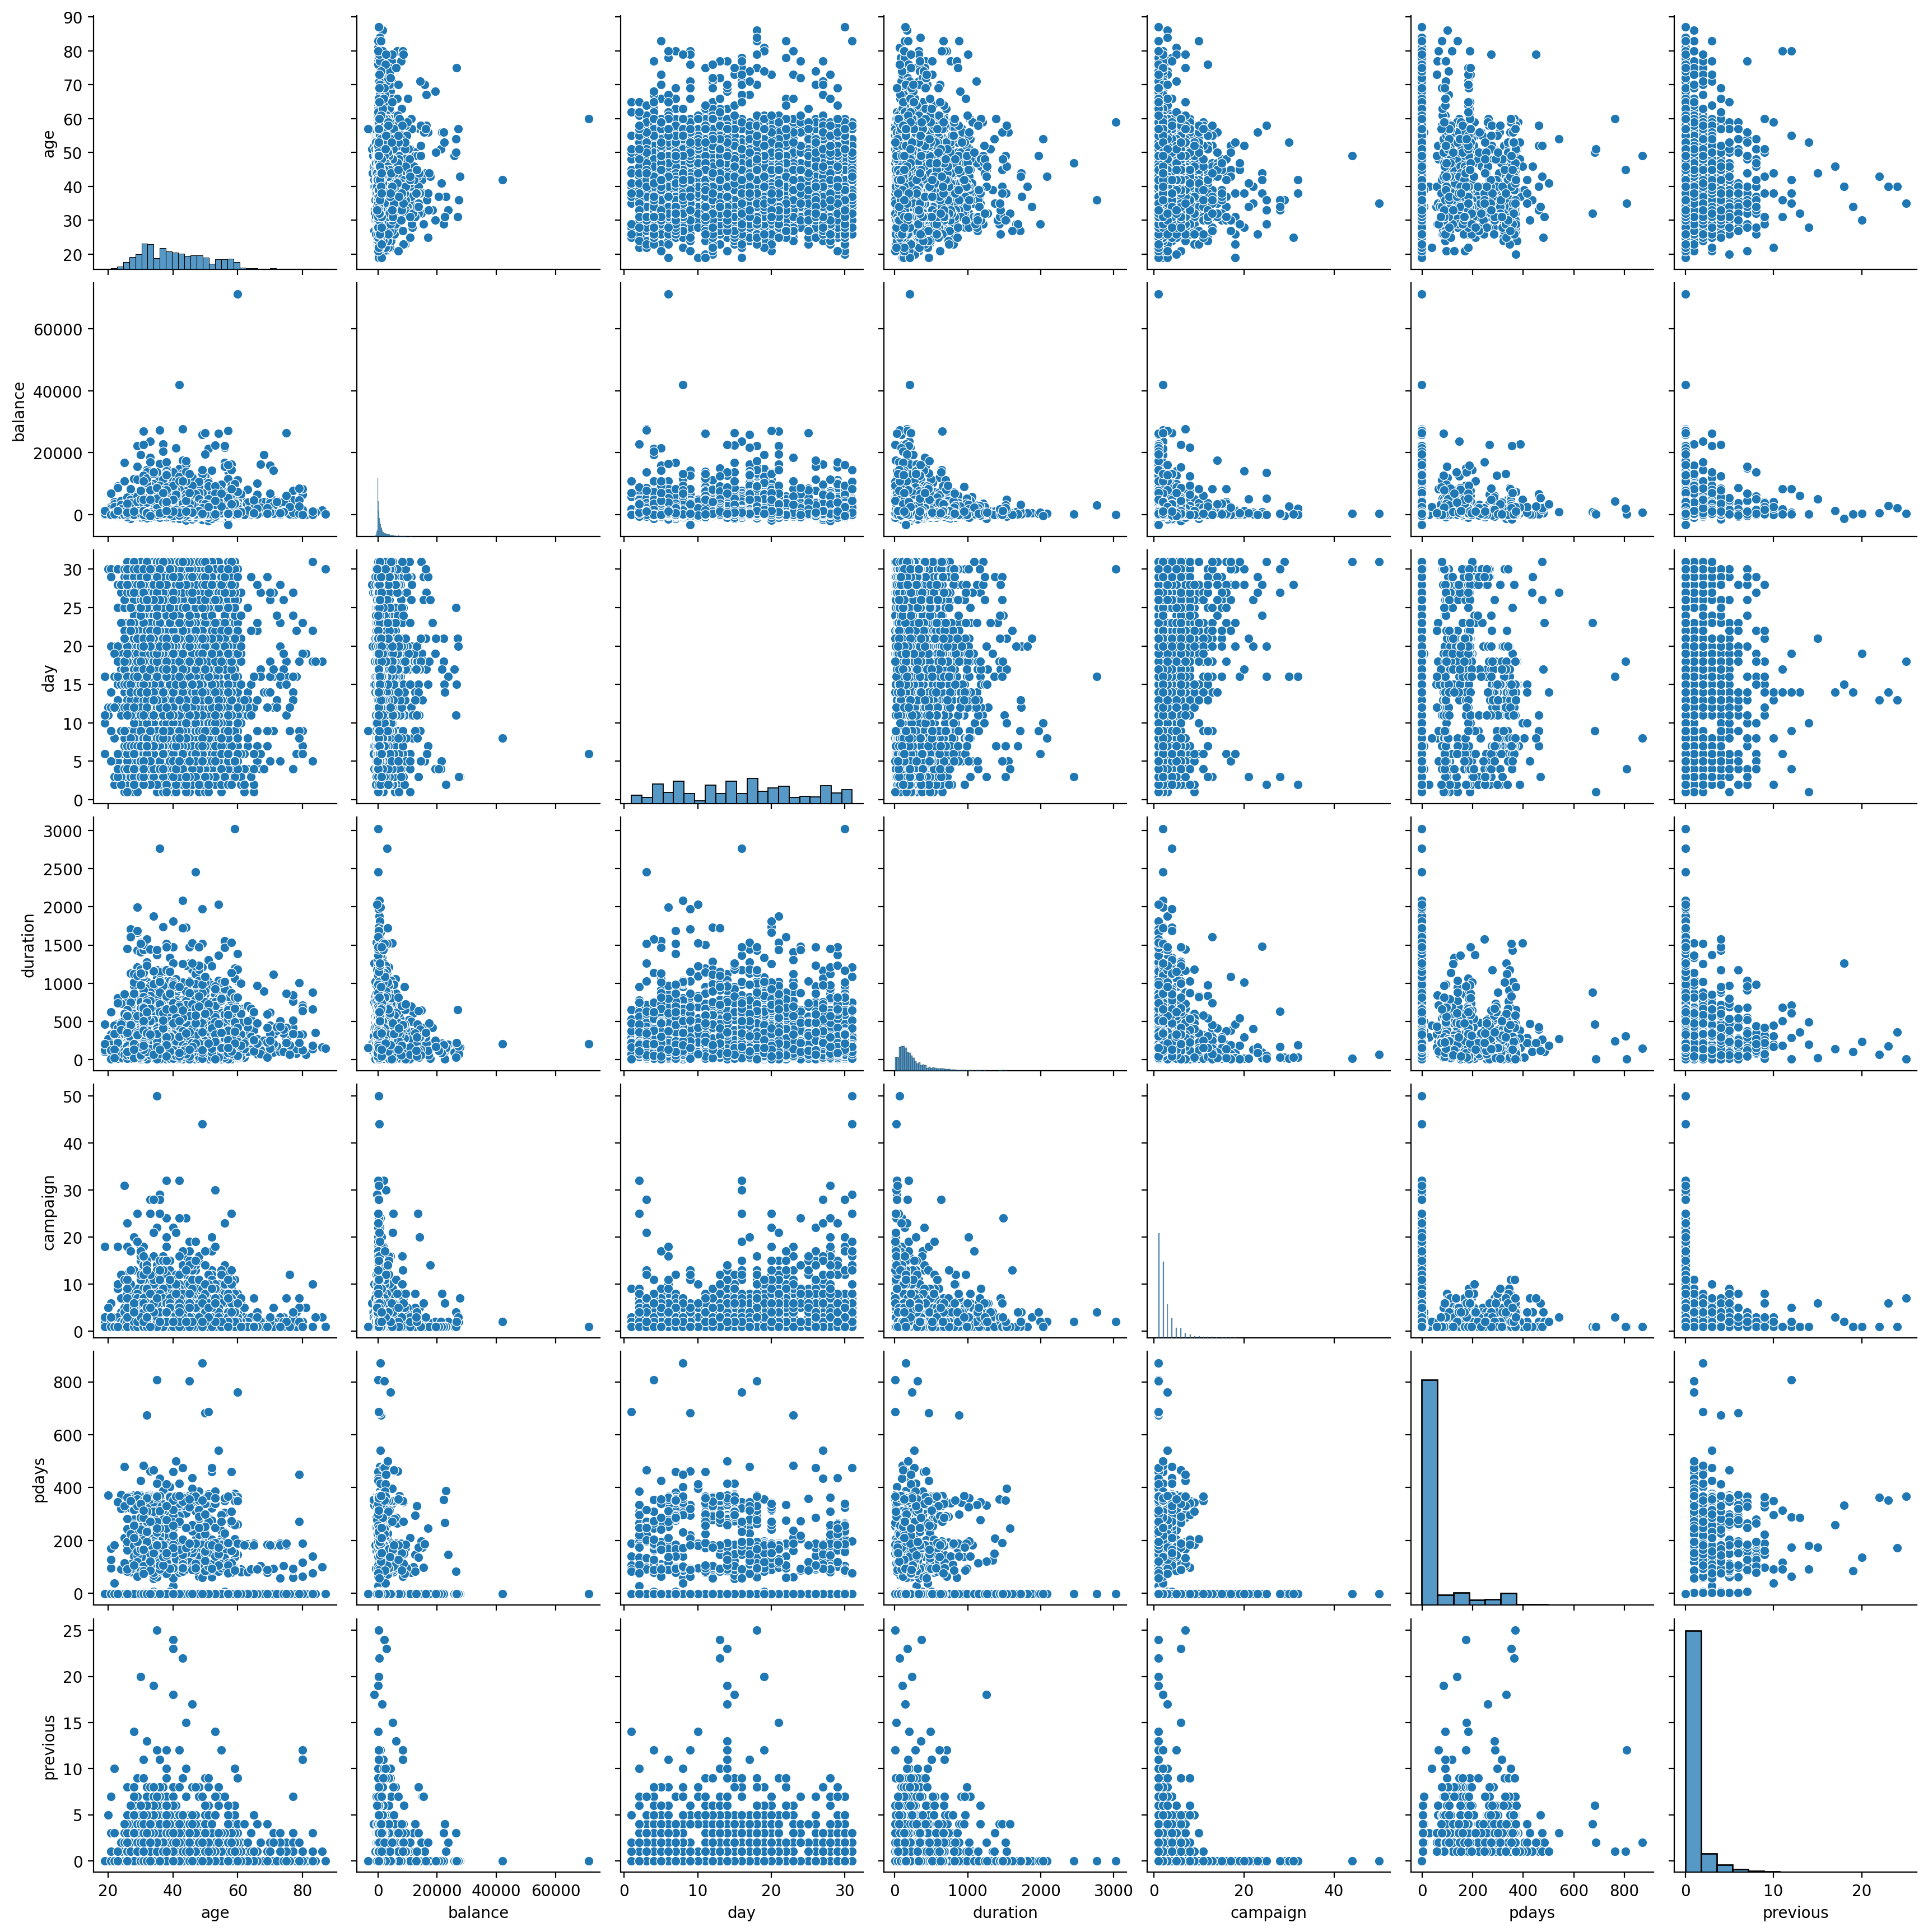

In [41]:
# pairplot
plt.figure(figsize = (8, 5), facecolor = "white")

# plotting
sns.pairplot(
    data = df_bank,
    vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
)

plt.show()


**5. Problem Discovery and Solution**

**5.1. Does the longer the contact time, the higher the probability of subscribing?**

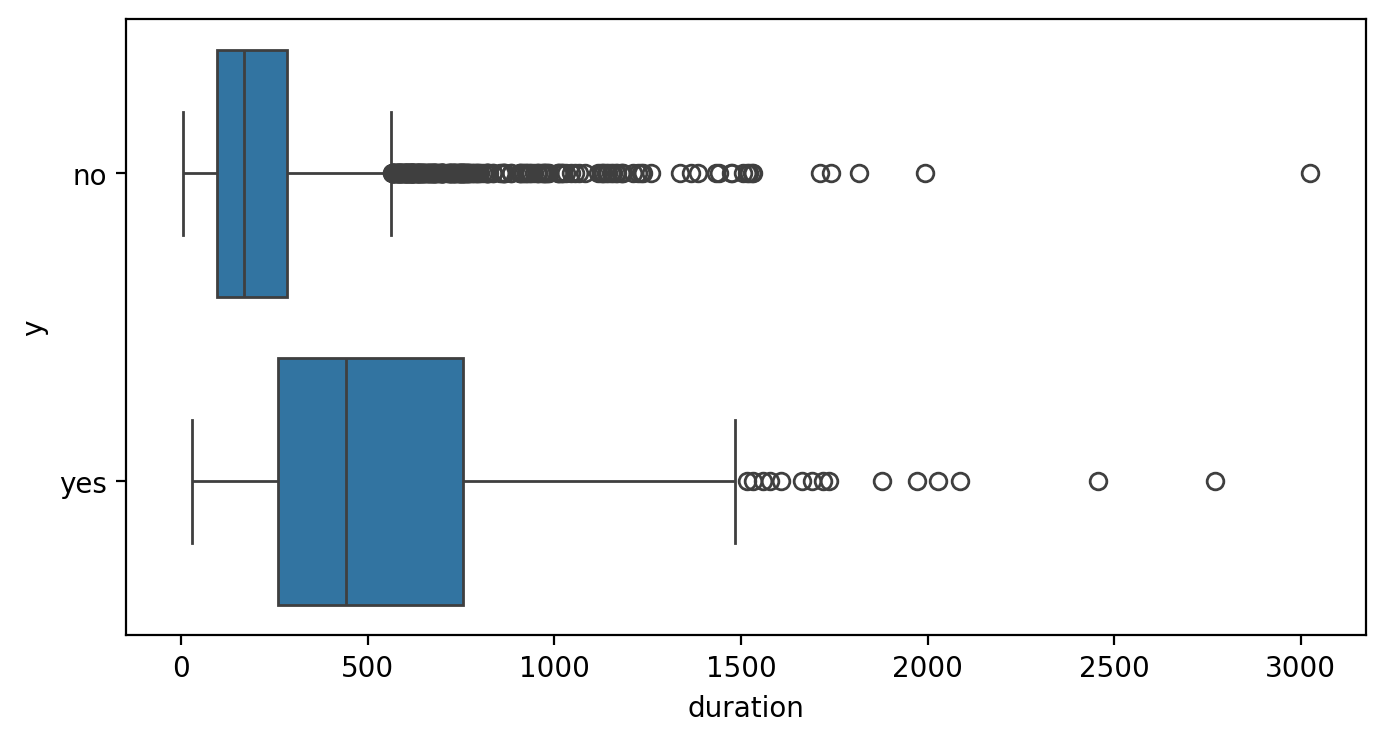

In [42]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.boxplot(
    data = df_bank,
    x = 'duration', y = 'y'
)

plt.show()

Yes, it's an intuitive conclusion.

**5.2. What are the categorical variables related to the subscription rate?**

In [43]:
from scipy.stats import chi2_contingency


In [44]:
temp_crosstab = pd.crosstab(df_bank['job'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 1.901391096662705e-10


y               no  yes  ratio(yes/total)
job                                      
admin.         420   58          0.121339
blue-collar    877   69          0.072939
entrepreneur   153   15          0.089286
housemaid       98   14          0.125000
management     838  131          0.135191
retired        176   54          0.234783
self-employed  163   20          0.109290
services       379   38          0.091127
student         65   19          0.226190
technician     685   83          0.108073
unemployed     115   13          0.101562
unknown         31    7          0.184211

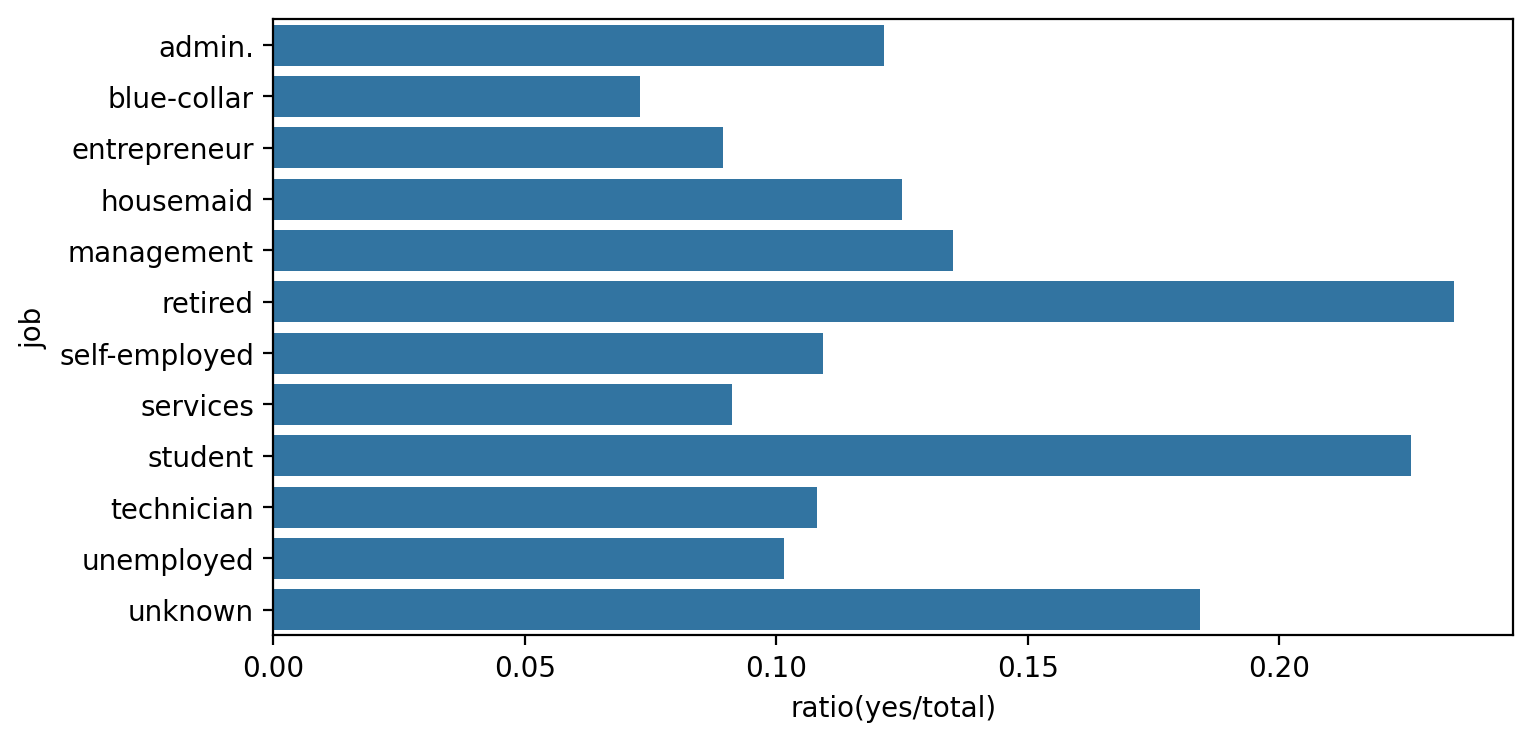

In [45]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.barplot(
    data = temp_crosstab,
    x = 'ratio(yes/total)', y = temp_crosstab.index
)

plt.show()

Retirees and students were more likely to subscribe.

In [46]:
temp_crosstab = pd.crosstab(df_bank['marital'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 7.373535401823763e-05


y           no  yes  ratio(yes/total)
marital                              
divorced   451   77          0.145833
married   2520  277          0.099035
single    1029  167          0.139632

Single or divorced people were more likely to subscribe.



In [47]:
temp_crosstab = pd.crosstab(df_bank['education'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 0.001625240003630989


y            no  yes  ratio(yes/total)
education                             
primary     614   64          0.094395
secondary  2061  245          0.106245
tertiary   1157  193          0.142963
unknown     168   19          0.101604

People who have been educated up to tertiary education were more likely to subscribe.



In [48]:
temp_crosstab = pd.crosstab(df_bank['housing'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 2.7146998959323014e-12


y          no  yes  ratio(yes/total)
housing                             
no       1661  301          0.153415
yes      2339  220          0.085971

People who don't have housing loan were more likely to subscribe.



In [49]:
temp_crosstab = pd.crosstab(df_bank['loan'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 2.9148288298428256e-06


y       no  yes  ratio(yes/total)
loan                             
no    3352  478          0.124804
yes    648   43          0.062229

People who don't have loan were more likely to subscribe.



In [50]:
temp_crosstab = pd.crosstab(df_bank['contact'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 8.30430129641147e-20


y            no  yes  ratio(yes/total)
contact                               
cellular   2480  416          0.143646
telephone   257   44          0.146179
unknown    1263   61          0.046073

The subscription rate of the 'unknown' group was low.



In [51]:
temp_crosstab = pd.crosstab(df_bank['month'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 2.195354833570811e-47


y        no  yes  ratio(yes/total)
month                             
apr     237   56          0.191126
aug     554   79          0.124803
dec      11    9          0.450000
feb     184   38          0.171171
jan     132   16          0.108108
jul     645   61          0.086402
jun     476   55          0.103578
mar      28   21          0.428571
may    1305   93          0.066524
nov     350   39          0.100257
oct      43   37          0.462500
sep      35   17          0.326923

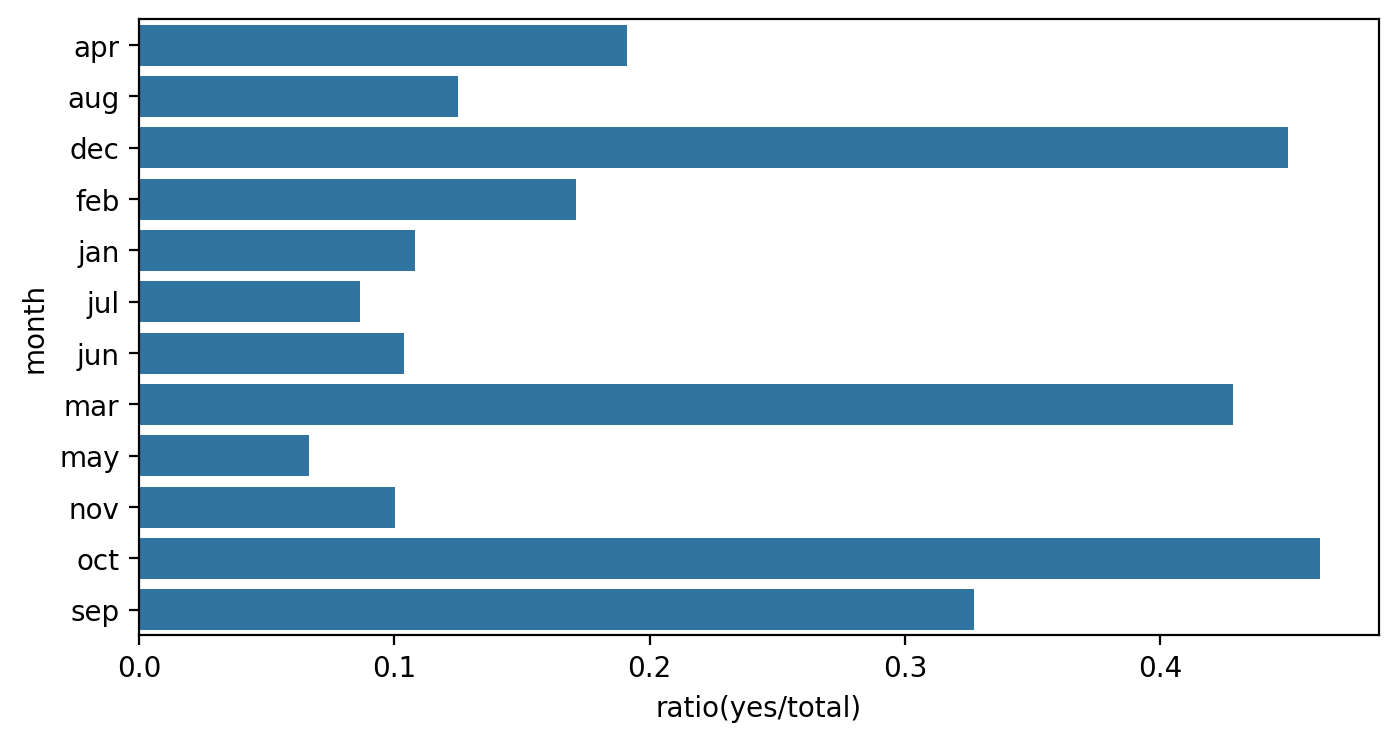

In [52]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.barplot(
    data = temp_crosstab,
    x = 'ratio(yes/total)', y = temp_crosstab.index
)

plt.show()

In [53]:
temp_crosstab = pd.crosstab(df_bank['poutcome'], df_bank['y'])
print(f"chi2 test p-value = {chi2_contingency(temp_crosstab)[1]}")
temp_crosstab['ratio(yes/total)'] = temp_crosstab['yes'] / (temp_crosstab['yes'] + temp_crosstab['no'])
display(temp_crosstab)

chi2 test p-value = 1.5398831095860172e-83


y           no  yes  ratio(yes/total)
poutcome                             
failure    427   63          0.128571
other      159   38          0.192893
success     46   83          0.643411
unknown   3368  337          0.090958

The person who had previously succeeded in subscription was more likely to subscribe.



**5.3. What is the relationship between the number of contacts by month and the subscription rate?**

In [54]:
crosstab_month_y = pd.crosstab(df_bank['month'], df_bank['y'])
crosstab_month_y['total'] = crosstab_month_y['yes'] + crosstab_month_y['no']
crosstab_month_y['ratio(yes/total)'] = crosstab_month_y['yes'] / (crosstab_month_y['yes'] + crosstab_month_y['no'])
display(crosstab_month_y)

y        no  yes  total  ratio(yes/total)
month                                    
apr     237   56    293          0.191126
aug     554   79    633          0.124803
dec      11    9     20          0.450000
feb     184   38    222          0.171171
jan     132   16    148          0.108108
jul     645   61    706          0.086402
jun     476   55    531          0.103578
mar      28   21     49          0.428571
may    1305   93   1398          0.066524
nov     350   39    389          0.100257
oct      43   37     80          0.462500
sep      35   17     52          0.326923

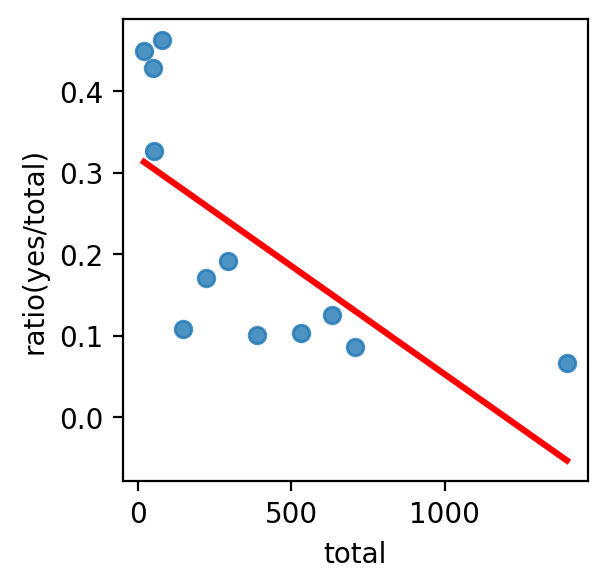

In [55]:
plt.figure(figsize = (3, 3), facecolor = "white")

sns.regplot(
    data = crosstab_month_y,
    x = 'total', y = 'ratio(yes/total)',
    ci = False,
    line_kws = {'color': 'red'}
)

plt.show()

There is a tendency of negative correlation, and further research is needed for this.